# EXPLORATORY DATA ANALYSIS (EDA)

## 1. Read file

In [2]:
import numpy as np # linear algebra
import nbformat
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pprint
import matplotlib.pyplot as plt
import plotl
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ModuleNotFoundError: No module named 'numpy'

In [2]:
df = pd.read_csv("C:\\Users\\unknow\\Documents\\Loan_Eligibility_Prediction_System\\loan_approval_dataset.csv")

## 2. Updated Metadata

In [3]:
metadata_dict = {
'loan_id'        : 'loan ID number',
'dependents'     : 'number of dependents',
'education'      : 'education status (graduate/not graduate)',
'self_employed'  : 'self-employed status',
'annual_income'  : 'self-reported annual income',
'loan_amount'    : 'loan amount',
'loan_term'      : 'loan term in year',
'credit_score'   : 'credit score (Indian cibil score system, range 300-900)',
'residential_av' : 'residential assets value',
'commercial_av'  : 'commercial assets value',
'luxury_av'      : 'luxury assets value',
'bank_av'        : 'bank assets value',
'loan_status'    : 'loan status (approved/rejected)'
}

## 3. Name change

In [4]:
df.columns = ['loan_id', 'dependents', 'education', 'self_employed', 'annual_income', 'loan_amount', 'loan_term', 
              'credit_score', 'residential_av', 'commercial_av', 'luxury_av', 'bank_av', 'loan_status']

In [5]:
df.head(2)

loan_id  dependents      education self_employed  annual_income  \
0        1           2       Graduate            No        9600000   
1        2           0   Not Graduate           Yes        4100000   

   loan_amount  loan_term  credit_score  residential_av  commercial_av  \
0     29900000         12           778         2400000       17600000   
1     12200000          8           417         2700000        2200000   

   luxury_av  bank_av loan_status  
0   22700000  8000000    Approved  
1    8800000  3300000    Rejected

In [6]:
for col in df.columns:
    pprint.pprint(col)

'loan_id'
'dependents'
'education'
'self_employed'
'annual_income'
'loan_amount'
'loan_term'
'credit_score'
'residential_av'
'commercial_av'
'luxury_av'
'bank_av'
'loan_status'


## 4. Remove whitespaces

In [7]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

## 5. Information, data types, data shape, null data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_id         4269 non-null   int64 
 1   dependents      4269 non-null   int64 
 2   education       4269 non-null   object
 3   self_employed   4269 non-null   object
 4   annual_income   4269 non-null   int64 
 5   loan_amount     4269 non-null   int64 
 6   loan_term       4269 non-null   int64 
 7   credit_score    4269 non-null   int64 
 8   residential_av  4269 non-null   int64 
 9   commercial_av   4269 non-null   int64 
 10  luxury_av       4269 non-null   int64 
 11  bank_av         4269 non-null   int64 
 12  loan_status     4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
print(f"Duplicated data: {df.duplicated().sum()}")
print(f"Data shape: {df.shape}")
print(f"Null data: {df.isnull().sum().sum()}")

Duplicated data: 0
Data shape: (4269, 13)
Null data: 0


## 6. Data statistics

In [10]:
df.describe().round(1).T

count        mean        std       min        25%  \
loan_id         4269.0      2135.0     1232.5       1.0     1068.0   
dependents      4269.0         2.5        1.7       0.0        1.0   
annual_income   4269.0   5059123.9  2806839.8  200000.0  2700000.0   
loan_amount     4269.0  15133450.5  9043363.0  300000.0  7700000.0   
loan_term       4269.0        10.9        5.7       2.0        6.0   
credit_score    4269.0       599.9      172.4     300.0      453.0   
residential_av  4269.0   7472616.5  6503636.6 -100000.0  2200000.0   
commercial_av   4269.0   4973155.3  4388966.1       0.0  1300000.0   
luxury_av       4269.0  15126305.9  9103753.7  300000.0  7500000.0   
bank_av         4269.0   4976692.4  3250185.3       0.0  2300000.0   

                       50%         75%         max  
loan_id             2135.0      3202.0      4269.0  
dependents             3.0         4.0         5.0  
annual_income    5100000.0   7500000.0   9900000.0  
loan_amount     14500000.0  21500000.0  39500000.0  
loan_term             10.0        16.0        20.0  
credit_score         600.0       748.0       900.0  
residential_av   5600000.0  11300000.0  29100000.0  
commercial_av    3700000.0   7600000.0  19400000.0  
luxury_av       14600000.0  21700000.0  39200000.0  
bank_av          4600000.0   7100000.0  14700000.0

## 7. Quick look at Loan IDs

In [11]:
df.head(2)

loan_id  dependents     education self_employed  annual_income  \
0        1           2      Graduate            No        9600000   
1        2           0  Not Graduate           Yes        4100000   

   loan_amount  loan_term  credit_score  residential_av  commercial_av  \
0     29900000         12           778         2400000       17600000   
1     12200000          8           417         2700000        2200000   

   luxury_av  bank_av loan_status  
0   22700000  8000000    Approved  
1    8800000  3300000    Rejected

In [12]:
print(f"There are {df['loan_id'].nunique()} unique loan IDs, each ID represent each row of the data frame with a size of {df.shape}.")

There are 4269 unique loan IDs, each ID represent each row of the data frame with a size of (4269, 13).


## 8. Drop 'loan_id' column

**We will not be using loan_id for furthur analysis.**

In [13]:
df.drop('loan_id', axis=1, inplace=True)

In [14]:
df.head(2)

dependents     education self_employed  annual_income  loan_amount  \
0           2      Graduate            No        9600000     29900000   
1           0  Not Graduate           Yes        4100000     12200000   

   loan_term  credit_score  residential_av  commercial_av  luxury_av  bank_av  \
0         12           778         2400000       17600000   22700000  8000000   
1          8           417         2700000        2200000    8800000  3300000   

  loan_status  
0    Approved  
1    Rejected

## 9. Explore each feature through visualization

In [15]:
for col in df.columns:
    print(f"\n'{col}'")
    
    # print unique values for columns that have 10 or less unique values count:
    if df[col].nunique() <= 10:
        
        # print all unique value count:
        print(f"\t unique value count: {df[col].nunique()}")
        
        # print unique values:
        print(f"\t unique values: {df[col].unique()}")
        
        # create pie chart for columns with 2 or less unique values count:
        if df[col].nunique() <= 2:
            fig = px.pie(names=df[col].groupby(by=df[col]).count().index, 
                         values=df[col].groupby(by=df[col]).count().values, 
                         width=600, height=400)
            fig.update_traces(text=df[col].groupby(by=df[col]).count().values, textposition='inside')
            fig.show()
        
        # create bar chart for columns with more than 2 unique values count:
        elif df[col].nunique() > 2:
            fig = px.bar(x=df[col].groupby(by=df[col]).count().index, 
                         y=df[col].groupby(by=df[col]).count().values, 
                         labels={'x':col, 'y':'count / frequency'}, 
                         width=600, height=400)
            fig.update_traces(text=df[col].groupby(by=df[col]).count().values, textposition='inside')
            fig.update_layout(xaxis=dict(tickmode='array', 
                                         tickvals=df[col].groupby(by=df[col]).count().index, 
                                         ticktext=df[col].groupby(by=df[col]).count().index))
            fig.show()
    
    # create histogram for columns with more than 10 unique values and less than or equal to the data length of 4269:
    elif df[col].nunique() > 10 and df[col].nunique() <= len(df):
        
        # print mean and standard deviation of the column:
        print(f"\tStandard deviation: {df[col].std().round(2)}")
        print(f"\tMean: {df[col].mean().round(2)}")
        
        fig = px.histogram(df, x=col)
        fig.update_layout(xaxis_title = col, yaxis_title = 'count / frequency', 
                          width=600, height=400)
        fig.show()
    
    print("\n"+("-"*80))


'dependents'
	 unique value count: 6
	 unique values: [2 0 3 5 4 1]



--------------------------------------------------------------------------------

'education'
	 unique value count: 2
	 unique values: ['Graduate' 'Not Graduate']



--------------------------------------------------------------------------------

'self_employed'
	 unique value count: 2
	 unique values: ['No' 'Yes']



--------------------------------------------------------------------------------

'annual_income'
	Standard deviation: 2806839.83
	Mean: 5059123.92



--------------------------------------------------------------------------------

'loan_amount'
	Standard deviation: 9043362.98
	Mean: 15133450.46



--------------------------------------------------------------------------------

'loan_term'
	 unique value count: 10
	 unique values: [12  8 20 10  4  2 18 16 14  6]



--------------------------------------------------------------------------------

'credit_score'
	Standard deviation: 172.43
	Mean: 599.94



--------------------------------------------------------------------------------

'residential_av'
	Standard deviation: 6503636.59
	Mean: 7472616.54



--------------------------------------------------------------------------------

'commercial_av'
	Standard deviation: 4388966.09
	Mean: 4973155.31



--------------------------------------------------------------------------------

'luxury_av'
	Standard deviation: 9103753.67
	Mean: 15126305.93



--------------------------------------------------------------------------------

'bank_av'
	Standard deviation: 3250185.31
	Mean: 4976692.43



--------------------------------------------------------------------------------

'loan_status'
	 unique value count: 2
	 unique values: ['Approved' 'Rejected']



--------------------------------------------------------------------------------


## 10. Data correlation and matrix heatmap

In [16]:
df_corr = df.corr(numeric_only=True) #default method: pearson

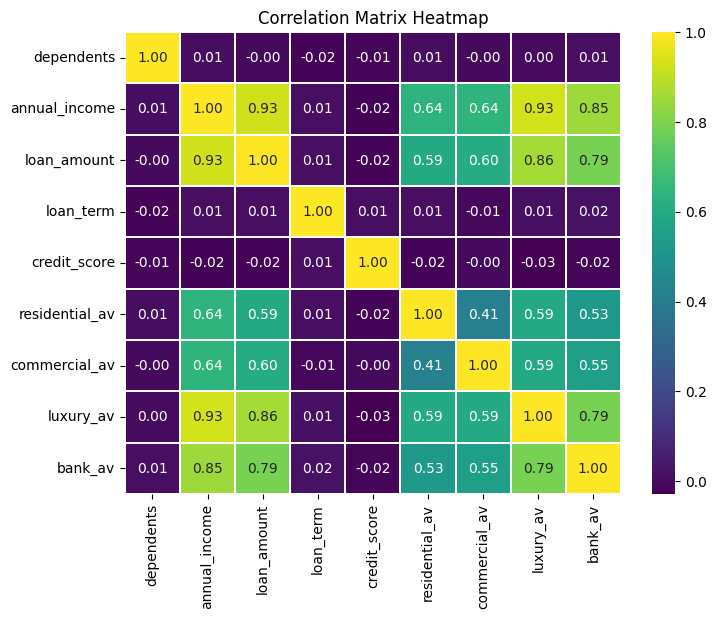

In [17]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.01)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 11. Let's take a look at feature pairs with high correlation score (>0.5)

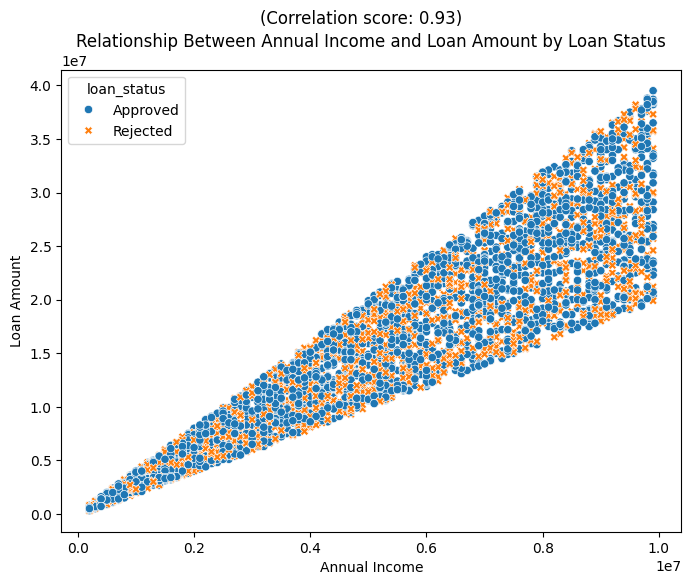

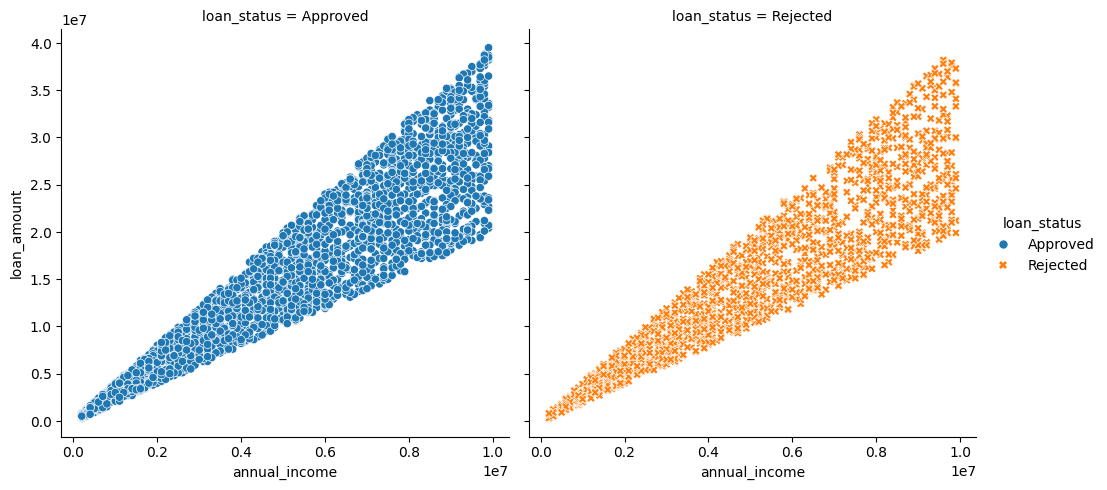

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='annual_income', y='loan_amount', hue='loan_status', style='loan_status')
plt.title('Relationship Between Annual Income and Loan Amount by Loan Status')
plt.suptitle("(Correlation score: 0.93)")
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

sns.relplot(df, x="annual_income", y="loan_amount", col="loan_status", hue="loan_status", style="loan_status", kind="scatter")
plt.show()

## 12. Relationship between Loan Amount/Annual Income and Combined Assets Value

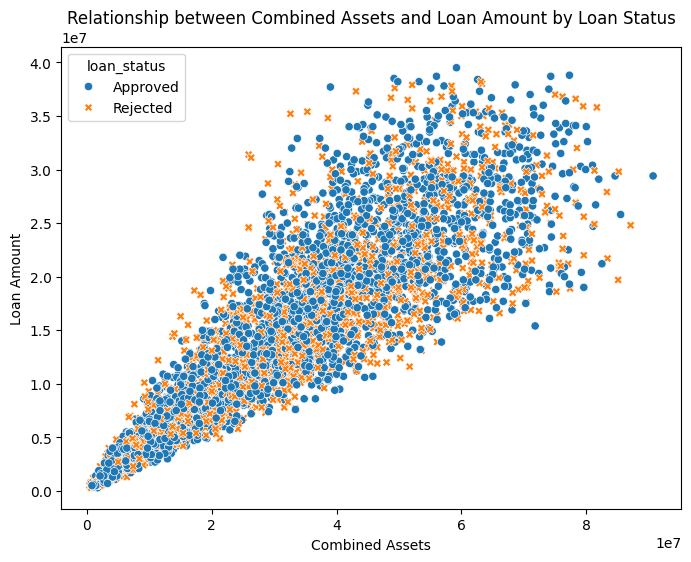

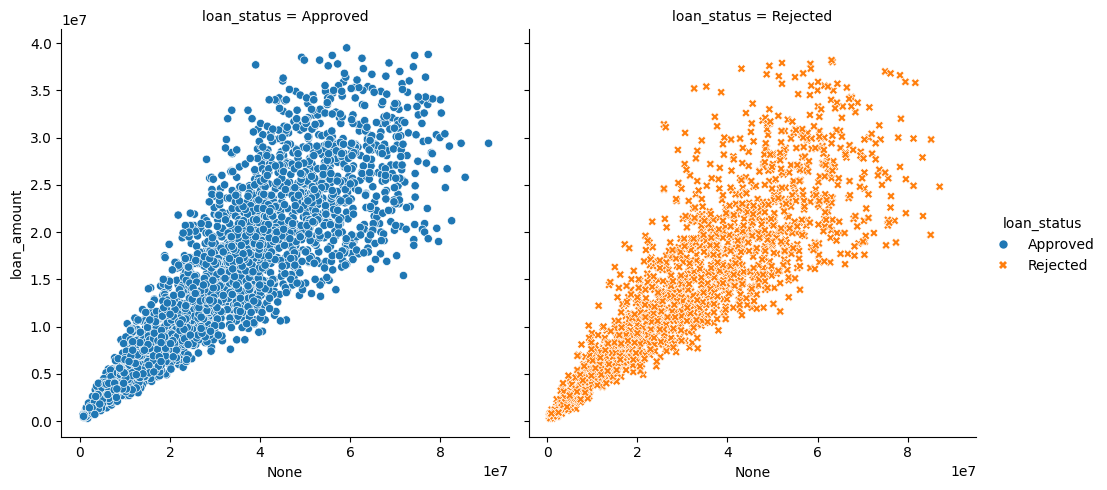


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------



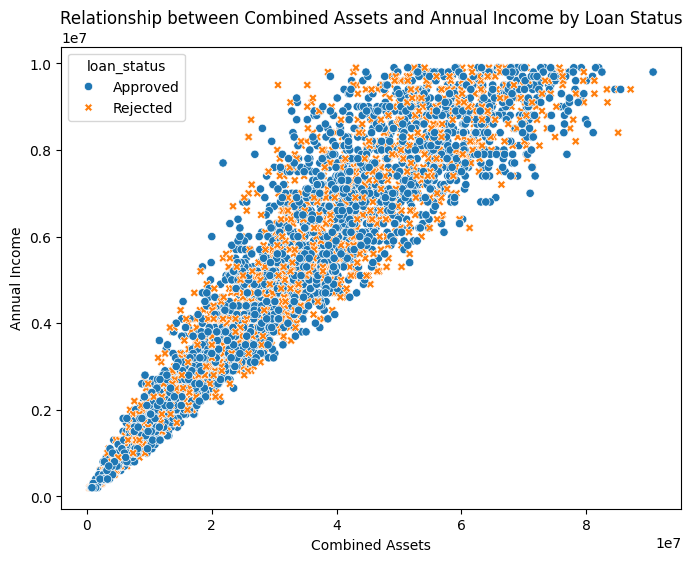

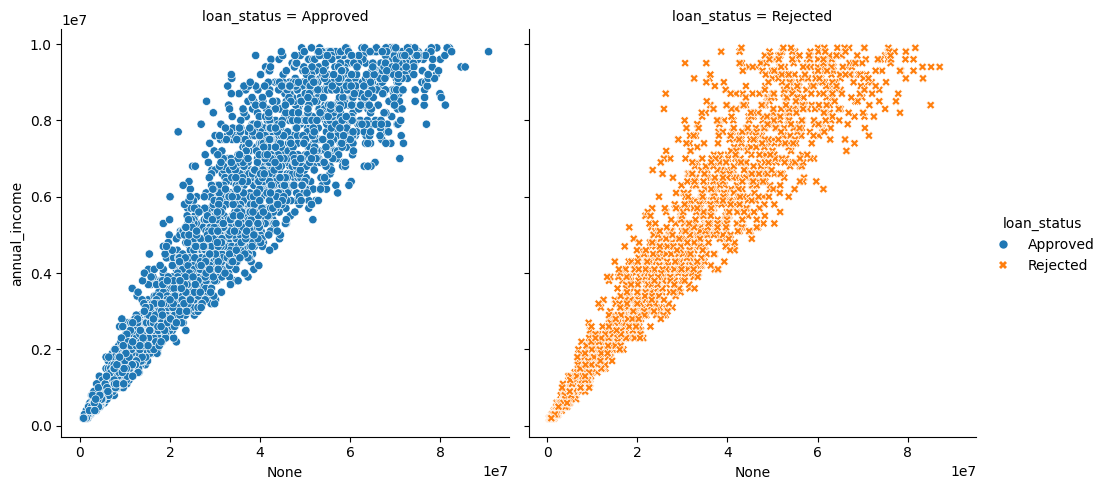


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------



In [19]:
combined_av = df.apply(lambda row: row['residential_av']+row['commercial_av']+row['bank_av']+row['luxury_av'], axis=1)
for col, name in {'loan_amount':'Loan Amount', 'annual_income':'Annual Income'}.items():
    plt.figure(figsize=(8,6))
    sns.scatterplot(df, x=combined_av, y=col, hue='loan_status', style='loan_status')
    plt.title(f"Relationship between Combined Assets and {name} by Loan Status")
    plt.xlabel('Combined Assets')
    plt.ylabel(name)
    plt.show()
    sns.relplot(df, x=combined_av, y=col, col="loan_status", hue="loan_status", style="loan_status", kind="scatter")
    plt.show()
    print("\n" + "-"*138)
    print("-"*138 + "\n")

## 13. Loan term count by loan status

In [20]:
# Calculate counts for each combination of loan_term and loan_status
count_term_status = df.groupby(['loan_term', 'loan_status']).size().reset_index(name='count')

# Calculate total counts for each loan_term
total_counts = count_term_status.groupby('loan_term')['count'].sum().reset_index(name='total_count')

# Merge total counts with the count_term_status to calculate percentages
count_term_status = count_term_status.merge(total_counts, on='loan_term')
count_term_status['percentage'] = (count_term_status['count'] / count_term_status['total_count'] * 100).round(0).astype(int)

#create a string of value of percentage
count_term_status['count_percentage'] = count_term_status['count'].astype(str).str.cat(count_term_status['percentage'].astype(str), sep='<br>(') + '%)'

In [21]:
# Create a bar chart
fig = px.bar(count_term_status, x='loan_term', y='count', color='loan_status', text='count_percentage', width=700, height=500)

# Update x labels
fig.update_xaxes(tickangle=0, tickmode='array', tickvals=count_term_status['loan_term'], ticktext=count_term_status['loan_term'])

# Update layout for better visual appearance
fig.update_layout(xaxis_title = 'Loan Term in Year', 
                  yaxis_title = 'Count', 
                  title = {"text":"Loan Term Count by Status", 
                           "font":{'size': 18, 'color': 'black', 'weight':'bold'}, 
                           "x":0.5, 
                           "xanchor": "center"})

# Update traces to show text labels inside the bars with bold font
fig.update_traces(texttemplate='%{text}', 
                  textposition='inside', 
                  textfont=dict(size=9, color="white", weight="normal"))

# Add total count labels as an additional trace
for _, row in total_counts.iterrows():
    fig.add_annotation(
        x=row['loan_term'],
        y=row['total_count'],
        text=f"{row['total_count']}",
        showarrow=False,
        yshift=10,
        font=dict(size=10, color="black", weight="bold"),
        align="center")

# Show the figure
fig.show()

* **Applicants are more likely to get approved (with over 80% chances) with shorter loan terms (2-4 years).**

* **For loans with term of 6 years or more, average chances are 57/43 of gettin approved or denied, still more lilely to get approved.**

## 14. Histograms for Loan Amount, Annual Income, and Credit Score by Loan Status

In [22]:
# Histograms for Loan Amount, Annual Income, and Credit Score by Loan Status
for col in df[['loan_amount', 'annual_income', 'credit_score']]:
    fig = px.histogram(df, x=col, color='loan_status', width=800, height=600)
    fig.show()

* **Credit score of 560 and above have significant chances of getting approved (most likely approved, 95% chances).**
* **50/50 chance for credit score between 540 to 559.**
* **Average 15% approval chane for credit score under 540.**

<hr>
<hr>
<hr>
<hr>
<hr>

# MACHINE LEARNING MODELS

Summary:
* Encode categorical features to 1 and 0
* Scale numerical features using Robust Scaler

## 1. Data Pre-processing and Encoding

In [23]:
# Convert loan tearm in years to days:
df['loan_term'] = df['loan_term']*365

In [24]:
categorical_features = ['education', 'self_employed', 'loan_status']
categorical_df = df[categorical_features]

In [25]:
def encoder(dataframe, features):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(dataframe)
    encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
    return encoded_dataframe

In [26]:
encoded_df = encoder(categorical_df, categorical_features)
encoded_df.head(2)

education_Graduate  education_Not Graduate  self_employed_No  \
0                 1.0                     0.0               1.0   
1                 0.0                     1.0               0.0   

   self_employed_Yes  loan_status_Approved  loan_status_Rejected  
0                0.0                   1.0                   0.0  
1                1.0                   0.0                   1.0

In [27]:
encoded_df = encoded_df[['education_Graduate','self_employed_Yes','loan_status_Approved']]
encoded_df.head(2)

education_Graduate  self_employed_Yes  loan_status_Approved
0                 1.0                0.0                   1.0
1                 0.0                1.0                   0.0

In [28]:
# Make a copy from original df and assign it to df_w_encode
df_w_encode = df.copy()
# Replace catergorical data with encoding data from encoded_df
df_w_encode[categorical_features] = encoded_df
# Show:
df_w_encode.head(2)

dependents  education  self_employed  annual_income  loan_amount  \
0           2        1.0            0.0        9600000     29900000   
1           0        0.0            1.0        4100000     12200000   

   loan_term  credit_score  residential_av  commercial_av  luxury_av  bank_av  \
0       4380           778         2400000       17600000   22700000  8000000   
1       2920           417         2700000        2200000    8800000  3300000   

   loan_status  
0          1.0  
1          0.0

## 3. Data Scaling

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

**Since financial data like annual income and asset values can often have outliers, using RobustScaler may be more effective because it focuses on the interquartile range.**

In [29]:
numerical_features = ['annual_income', 'loan_amount', 'loan_term', 'credit_score', 
                      'residential_av', 'commercial_av', 'luxury_av', 'bank_av']
df_w_numerical = df_w_encode[numerical_features]

In [30]:
rb_scaler = RobustScaler(quantile_range=(20,80))  # default quantile_range=(25,75)
rb_scaler.fit(df_w_numerical)

RobustScaler(quantile_range=(20, 80))

In [31]:
# bring scaled data into dataframe
df_w_numerical_scaled = pd.DataFrame(rb_scaler.transform(df_w_numerical), columns=df_w_numerical.columns)
# Make a copy
df_w_encode_numerical_scaled = df_w_encode.copy()
# Assign the scaled features back to the dataframe with encode
df_w_encode_numerical_scaled[numerical_features] = df_w_numerical_scaled[numerical_features]

In [32]:
df_w_encode_numerical_scaled.describe().round(1).T

count  mean  std  min  25%  50%  75%  max
dependents      4269.0   2.5  1.7  0.0  1.0  3.0  4.0  5.0
education       4269.0   0.5  0.5  0.0  0.0  1.0  1.0  1.0
self_employed   4269.0   0.5  0.5  0.0  0.0  1.0  1.0  1.0
annual_income   4269.0  -0.0  0.5 -0.8 -0.4  0.0  0.4  0.8
loan_amount     4269.0   0.0  0.5 -0.8 -0.4  0.0  0.4  1.5
loan_term       4269.0   0.1  0.6 -0.8 -0.4  0.0  0.6  1.0
credit_score    4269.0  -0.0  0.5 -0.8 -0.4  0.0  0.4  0.8
residential_av  4269.0   0.2  0.6 -0.5 -0.3  0.0  0.5  2.1
commercial_av   4269.0   0.2  0.6 -0.5 -0.3  0.0  0.5  2.0
luxury_av       4269.0   0.0  0.5 -0.8 -0.4  0.0  0.4  1.4
bank_av         4269.0   0.1  0.6 -0.8 -0.4  0.0  0.4  1.7
loan_status     4269.0   0.6  0.5  0.0  0.0  1.0  1.0  1.0

In [33]:
# dataframe use to train models

df_w_encode_numerical_scaled.head(2)

dependents  education  self_employed  annual_income  loan_amount  \
0           2        1.0            0.0       0.775862     0.895349   
1           0        0.0            1.0      -0.172414    -0.133721   

   loan_term  credit_score  residential_av  commercial_av  luxury_av  \
0        0.2      0.498599       -0.282187       1.782051   0.468208   
1       -0.2     -0.512605       -0.255732      -0.192308  -0.335260   

    bank_av  loan_status  
0  0.576271          1.0  
1 -0.220339          0.0

## 2. Data splitting for training and testing

In [34]:
x = df_w_encode_numerical_scaled.drop('loan_status', axis=1)
y = df_w_encode_numerical_scaled['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3415, 11) (854, 11) (3415,) (854,)


## 4. ML Models and result comparation

In [35]:
ml_models = [("eXtremGradientBoosting" , XGBClassifier()),  
             ("GradientBoosting" , GradientBoostingClassifier()), 
             ("RandomForest" , RandomForestClassifier()), 
             ("DecisionTree" , DecisionTreeClassifier())]

In [36]:
for model in ml_models:
    print(model[0]+": ")
    model[1].fit(x_train, y_train)
    y_pred = model[1].predict(x_test)
    print('\troc_auc_score ',round(roc_auc_score(y_pred, y_test),3))
    print('\tf1_score ',round(f1_score(y_pred, y_test),3))
    print("\n" + classification_report(y_pred, y_test))
    print("-"*60 + "\n")

eXtremGradientBoosting: 
	roc_auc_score  0.988
	f1_score  0.991

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       321
           1       0.99      0.99      0.99       533

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

------------------------------------------------------------

GradientBoosting: 
	roc_auc_score  0.983
	f1_score  0.988

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       326
         1.0       0.98      0.99      0.99       528

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

------------------------------------------------------------

RandomForest: 
	roc_auc_score  0.987
	f1_score  0.99

              precision    recall  f1-score 

<hr>
<hr>
<hr>
<hr>
<hr>

In [37]:
model = XGBClassifier()

In [38]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(x_test)
print('\troc_auc_score ',round(roc_auc_score(y_pred, y_test),3))
print('\tf1_score ',round(f1_score(y_pred, y_test),3))
print("\n" + classification_report(y_pred, y_test))

	roc_auc_score  0.988
	f1_score  0.991

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       321
           1       0.99      0.99      0.99       533

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



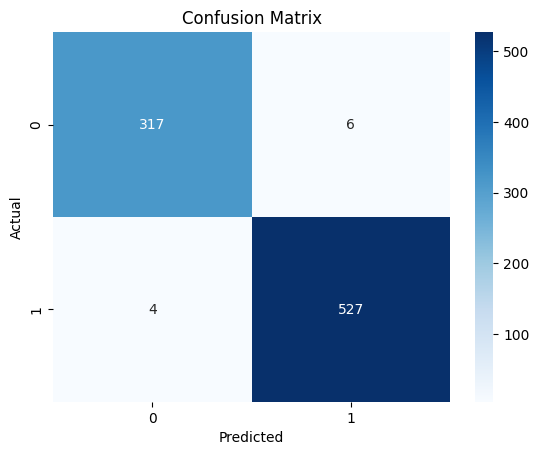

In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# HYPERPARAMETERS TUNING AND PERFORM GRIDSEARCHCV

In [41]:
param_grid = {
    'n_estimators': [10, 25, 50],
    'learning_rate': [0.1, 0.01, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.1, 0.2], 
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0]
}

In [42]:
# Initialize GridSearchCV
# Set n_jobs=-1 in GridSearchCV or RandomizedSearchCV to use all available CPU cores.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', return_train_score=True, n_jobs=-1)

In [ ]:
# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

In [161]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}


In [162]:
better_model = XGBClassifier(colsample_bytree=1.0, 
                             gamma=0.1, 
                             learning_rate=0.2, 
                             max_depth=7, 
                             min_child_weight=1,
                             n_estimators=50, 
                             subsample=1.0)

In [163]:
better_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [164]:
better_y_pred = better_model.predict(x_test)
print('\troc_auc_score ',round(roc_auc_score(better_y_pred, y_test),3))
print('\tf1_score ',round(f1_score(better_y_pred, y_test),3))
print("\n" + classification_report(better_y_pred, y_test))

	roc_auc_score  0.988
	f1_score  0.992

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       326
           1       0.99      0.99      0.99       528

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



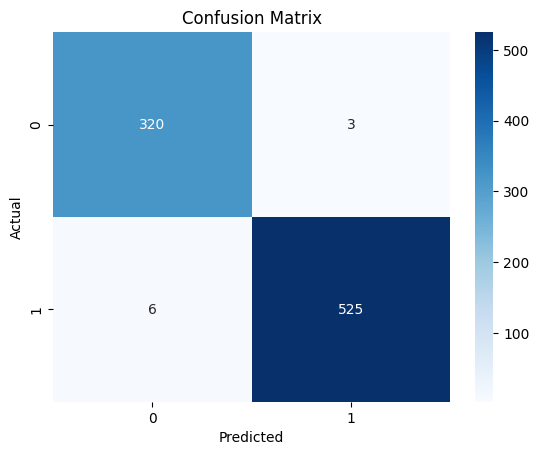

In [165]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, better_y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [166]:
forest_importances = pd.Series(better_model.feature_importances_, index=x_train.columns)
forest_importances.sort_values(ascending=False)

credit_score      0.715764
loan_term         0.182518
loan_amount       0.022995
annual_income     0.021248
residential_av    0.011847
luxury_av         0.010450
commercial_av     0.008647
dependents        0.008513
bank_av           0.007085
education         0.006966
self_employed     0.003967
dtype: float32

<hr>
<hr>
<hr>
<hr>
<hr>

# MODEL DEPLOYMENT

In [167]:
# Install streamlit (quiet mode -q)
!pip install streamlit -q


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
import streamlit as st
import joblib

In [169]:
joblib.dump(better_model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']

In [170]:
joblib.dump(rb_scaler, 'rb_scaler.pkl')

['rb_scaler.pkl']

## Write python app file

In [171]:
%%writefile app.py


import streamlit as st
import joblib
import xgboost as xgb
import pandas as pd


Model = joblib.load("loan_approval_model.pkl")
Scaler = joblib.load("rb_scaler.pkl")


numerical_cols = ['annual_income', 'loan_amount', 'loan_term', 'credit_score', 
                  'residential_av', 'commercial_av', 'luxury_av', 'bank_av']


def predict(dependents, education , self_employed, annual_income, loan_amount, loan_term, credit_score, 
            residential_av, commercial_assets_value, luxury_av, bank_av):
    test_df = pd.DataFrame(columns = ['dependents', 'education', 'self_employed', 'annual_income', 
                                      'loan_amount', 'loan_term', 'credit_score', 'residential_av', 
                                      'commercial_av', 'luxury_av', 'bank_av'])
    test_df.at[0,'dependents'] = dependents
    test_df.at[0,'education'] = education
    test_df.at[0,'self_employed'] = self_employed
    test_df.at[0,'annual_income'] = float(annual_income)
    test_df.at[0,'loan_amount'] = float(loan_amount)
    test_df.at[0,'loan_term'] = float(loan_term) * 365
    test_df.at[0,'credit_score'] = float(credit_score)
    test_df.at[0,'residential_av'] = float(residential_av)
    test_df.at[0,'commercial_av'] = float(commercial_av)
    test_df.at[0,'luxury_av'] = float(luxury_av)
    test_df.at[0,'bank_av'] = float(bank_av)
    
    temp_df = pd.DataFrame(Scaler.transform(test_df[numerical_cols]),columns=numerical_cols)
    test_df.drop(numerical_cols, axis=1, inplace=True)
    test_df = pd.concat([test_df, temp_df], axis=1)
    test_df.dependents = test_df.dependents.astype(int)
    test_df.education = test_df.education.astype(int)
    test_df.self_employed = test_df.self_employed.astype(int)
    print(test_df.dtypes)
    result = Model.predict(test_df)[0]
    return result




input_data = pd.DataFrame({
    'dependents': [dependents],
    'education': [education],
    'self_employed': [self_employed],
    'annual_income': [annual_income],
    'loan_amount': [loan_amount],
    'loan_term': [loan_term],
    'credit_score': [credit_score],
    'residential_av': [residential_av],
    'commercial_av': [commercial_av],
    'luxury_av': [luxury_av],
    'bank_av': [bank_av]
})


# Predict loan approval
if st.button("Predict"):
        result = predict(dependents, 
                         education, 
                         self_employed, 
                         annual_income, 
                         loan_amount, 
                         loan_term, 
                         credit_score, 
                         residential_av, 
                         commercial_av, 
                         luxury_av, 
                         bank_av)
        label = ["rejected","approved"]
        st.markdown("## The application is **{}**.".format(label[result]))

Overwriting app.py


In [172]:
# Install localtunnel@2.0.2 (quiet mode -q)
!npm install -g localtunnel@2.0.2 -q


changed 22 packages in 5s

3 packages are looking for funding
  run `npm fund` for details


In [173]:
#copy this series of number and use it for the prompt in the url below
!wget -q -O - ipv4.icanhazip.com

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Run Demo

* **Remove '#' below and follow URL**

In [174]:
#! streamlit run app.py & npx localtunnel --port 8501

In [175]:
z

NameError: name 'z' is not defined